<a id='header'></a>
# Demo for data clustering

In this notebook we present the clustering functionalities from the `preprocess` module.

### Clustering

A synthetic data set is created and we perform clustering using the available partitioning functions:

- [**Section 1**](#variable_bins): Variable bins
- [**Section 2**](#predefined_bins): Pre-defined variable bins
- [**Section 3**](#zero_neighborhood_bins): Zero-neighborhood variable bins
- [**Section 4**](#mixture_fraction_bins): Bins of mixture fraction vector

***

**Should plots be saved?**

In [1]:
save_plots = False

***

In [2]:
from PCAfold import preprocess
import matplotlib.pyplot as plt
import numpy as np

# Set some initial parameters:
colors = ['#6a6e7a']
k_colors = ['#0e7da7', '#ceca70', '#b45050', '#2d2d54']
data_point = 2
font_size = 16

# Function for plotting:
def visualize_clustering(x, y, idx, xticks_list, xlim_list=[-1.1,1.1], xname=r'$var$'):
    
    populations = preprocess.get_populations(idx)
    n_clusters = len(np.unique(idx))
    figure = plt.figure(figsize=(7, 4))
    figureSubplot = plt.subplot(1,1,1)
    for k in range(0,n_clusters):
        plt.scatter(x[np.where(idx==k)], y[np.where(idx==k)], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k) + '$ - ' + str(populations[k]))
    plt.axis('equal')
    plt.xlim(xlim_list), plt.ylim([-0.1,1.1])
    plt.xticks(xticks_list), plt.yticks([0,1])
    plt.xlabel(xname)
    plt.grid(alpha=0.2)
    plt.title('Clustered data set', fontsize=font_size)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4, fontsize=font_size-4, markerscale=2)

***

## Clustering based on a single vector

[**Go up**](#header)

We start with partitioning the synthetic two-dimensional data set based on bins of a variable vector.

Create a synthetic two-dimensional data set:

In [3]:
var = np.linspace(-1,1,100)
y = -var**2 + 1

Plot the synthetic data set:

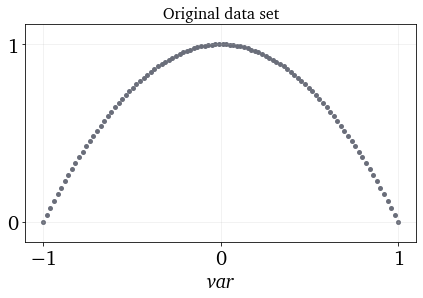

In [4]:
figure = plt.figure(figsize=(7, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(var, y, color=colors[0], marker='.', linewidth=data_point,)
plt.axis('equal')
plt.xlim([-1.1,1.1]), plt.ylim([0,1])
plt.xticks([-1,0,1]), plt.yticks([0,1])
plt.xlabel(r'$var$')
plt.grid(alpha=0.2)
plt.title('Original data set', fontsize=font_size)
if save_plots==True: plt.savefig('../images/tutorial-clustering-original-data-set.png', dpi = 500, bbox_inches='tight')

<a id='variable_bins'></a>
### Cluster with `variable_bins` into $k=4$ clusters:

[**Go up**](#header)

In [5]:
(idx_variable_bins, borders_variable_bins) = preprocess.variable_bins(var, 4, verbose=True)

Border values for bins:
[-1.0, -0.5, 0.0, 0.5, 1.0]

Bounds for cluster 0:
	-1.0, -0.5152
Bounds for cluster 1:
	-0.4949, -0.0101
Bounds for cluster 2:
	0.0101, 0.4949
Bounds for cluster 3:
	0.5152, 1.0


Visualize clustering of the data set:

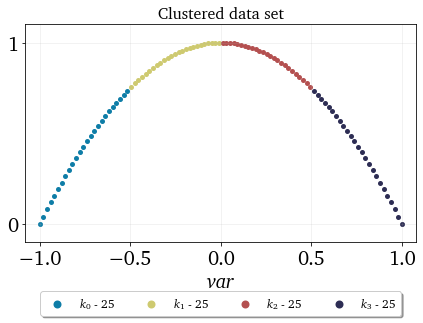

In [6]:
visualize_clustering(var, y, idx_variable_bins, [-1,-0.5,0,0.5,1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-variable-bins-k4.png', dpi = 500, bbox_inches='tight')

<a id='predefined_bins'></a>
### Cluster with `predefined_variable_bins` into $k=4$ clusters:

[**Go up**](#header)

In [7]:
split_values = [-0.6, 0.4, 0.8]
(idx_predefined_variable_bins, borders_predefined_variable_bins) = preprocess.predefined_variable_bins(var, split_values, verbose=True)

Border values for bins:
[-1.0, -0.6, 0.4, 0.8, 1.0]

Bounds for cluster 0:
	-1.0, -0.6162
Bounds for cluster 1:
	-0.596, 0.3939
Bounds for cluster 2:
	0.4141, 0.798
Bounds for cluster 3:
	0.8182, 1.0


Visualize clustering of the data set:

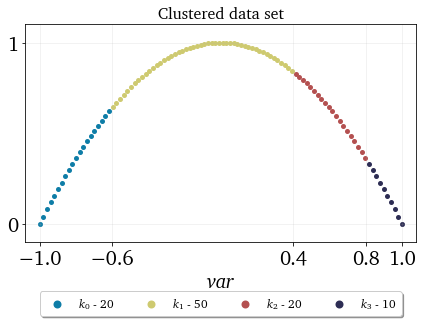

In [8]:
visualize_clustering(var, y, idx_predefined_variable_bins, [-1, -0.6, 0.4, 0.8, 1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-predefined-variable-bins-k4.png', dpi = 500, bbox_inches='tight')

<a id='zero_neighborhood_bins'></a>
### Cluster with `zero_neighborhood_bins` into $k=3$ clusters with `split_at_zero=True`:

[**Go up**](#header)

In [9]:
(idx_zero_neighborhood_bins, borders_zero_neighborhood_bins) = preprocess.zero_neighborhood_bins(var, 3, zero_offset_percentage=10, split_at_zero=False, verbose=True)

Border values for bins:
[-1.  -0.2  0.2  1. ]

Bounds for cluster 0:
	-1.0, -0.2121
Bounds for cluster 1:
	-0.1919, 0.1919
Bounds for cluster 2:
	0.2121, 1.0


Visualize clustering of the data set:

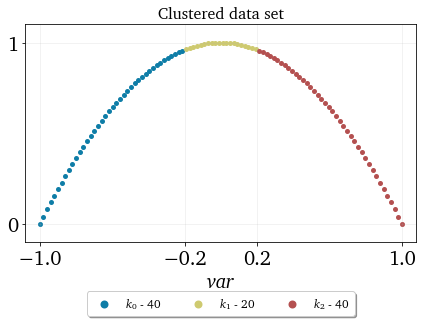

In [10]:
visualize_clustering(var, y, idx_zero_neighborhood_bins, [-1, -0.2, 0.2, 1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-zero-neighborhood-bins-k3.png', dpi = 500, bbox_inches='tight')

### Cluster with `zero_neighborhood_bins` into $k=4$ clusters with `split_at_zero=True`:

[**Go up**](#header)

In [11]:
(idx_zero_neighborhood_bins_split_at_zero, borders_zero_neighborhood_bins_split_at_zero) = preprocess.zero_neighborhood_bins(var, 4, zero_offset_percentage=10, split_at_zero=True, verbose=True)

Border values for bins:
[-1.  -0.2  0.   0.2  1. ]

Bounds for cluster 0:
	-1.0, -0.2121
Bounds for cluster 1:
	-0.1919, -0.0101
Bounds for cluster 2:
	0.0101, 0.1919
Bounds for cluster 3:
	0.2121, 1.0


Visualize clustering of the data set:

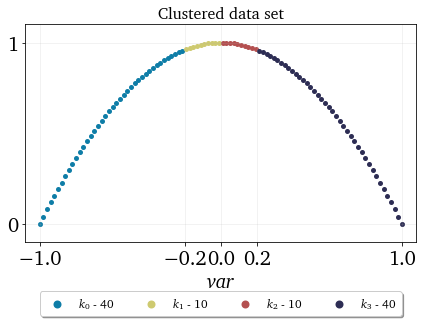

In [12]:
visualize_clustering(var, y, idx_zero_neighborhood_bins_split_at_zero, [-1, -0.2, 0, 0.2, 1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-zero-neighborhood-bins-split-at-zero-k4.png', dpi = 500, bbox_inches='tight')

<a id='mixture_fraction_bins'></a>
### Cluster with `mixture_fraction_bins` into $k=4$ clusters with `Z_stoich=0.4`:

[**Go up**](#header)

In [13]:
Z = np.linspace(0,1,100)
y_Z = (-25/9)*Z**2 + (20/9)*Z + (5/9)
(idx_mixture_fraction_bins, borders_mixture_fraction_bins) = preprocess.mixture_fraction_bins(Z, 4, 0.4, verbose=True)

Border values for bins:
[0.  0.2 0.4 0.7 1. ]

Bounds for cluster 0:
	0.0, 0.1919
Bounds for cluster 1:
	0.202, 0.3939
Bounds for cluster 2:
	0.404, 0.697
Bounds for cluster 3:
	0.7071, 1.0


Visualize clustering of the data set:

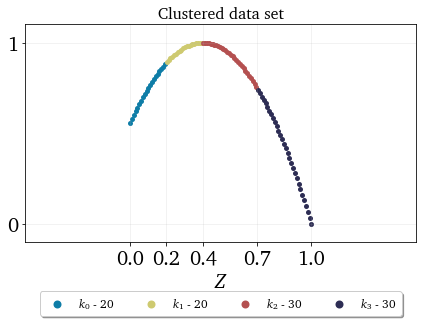

In [14]:
visualize_clustering(Z, y_Z, idx_mixture_fraction_bins, [0, 0.2, 0.4, 0.7, 1], xlim_list=[-0.01,1.01], xname=r'$Z$')
if save_plots==True: plt.savefig('../images/tutorial-clustering-mixture-fraction-bins-k4.png', dpi = 500, bbox_inches='tight')

***